# Milestone 1 - Data Science Phase 0
**Ediashta Revindra Amirussalam**

FTDS 20 - RMT

## Problem Statement

Sebagai seorang data analyst pada tim Rex Regum Qeon (RRQ), kamu diminta melakukan analisis data pada hasil pertandingan Turnamen VCT Pacific 2023

**Dengan menggunakan data yang tersedia, bagaimana strategi yang dapat disarankan untuk menghadapi Turnamen selanjutnya pada tahun 2024 agar dapat meraih tingkat kemenangan dengan minimal 60%**

## Data Preparation

In [30]:
#import library

import numpy as np
import pandas as pd
from scipy import stats as scipystats
from matplotlib import pyplot as plt
import seaborn as sns
from tabulate import tabulate

### Data Loading

Dataset pada milestone kali ini diambil dari link berikut
[VCT Pacific 2023 - Datasets](https://www.kaggle.com/datasets/kierru/vctpacific-2023).

Kita akan menggunakan 6 Dataset yang disediakan yaitu :
* stats
* agent id
* counter_kill
* pick_ban
* player id
* team id

In [31]:
#load data
stats = pd.read_csv('./Datasets/stats.csv')
agent_id = pd.read_csv('./Datasets/agent id (img).csv')
counter_kill = pd.read_csv('./Datasets/counter_kill.csv')
pick_ban = pd.read_csv('./Datasets/pick_ban.csv')
player_id = pd.read_csv('./Datasets/player id (img).csv')
team_id = pd.read_csv('./Datasets/team id (img).csv')
eco = pd.read_csv('./Datasets/eco.csv')


### Check info

Melakukan check info pada tiap dataset yang digunakan untuk mengetahui tipe data dan null value

In [32]:
#check info stats
print("-----------------stats info-----------------\n")
print(stats.info(), "\n")
print("Duplicated data :", stats[stats.duplicated()])



-----------------stats info-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_name   1330 non-null   object 
 1   team          1330 non-null   object 
 2   opponent      1330 non-null   object 
 3   rating        1330 non-null   float64
 4   acs           1330 non-null   int64  
 5   kill          1330 non-null   int64  
 6   death         1330 non-null   int64  
 7   assist        1330 non-null   int64  
 8   kast_percent  1330 non-null   object 
 9   adr           1330 non-null   int64  
 10  hs_percent    1330 non-null   object 
 11  first_kill    1330 non-null   int64  
 12  first_death   1330 non-null   int64  
 13  agent         1330 non-null   object 
 14  map           1330 non-null   object 
 15  score_team    1330 non-null   int64  
 16  score_opp     1330 non-null   int64  
 17  score_t       1330 non-nu

In [33]:
#check agent_id stats
print("-----------------agent info-----------------\n")
print(agent_id.info(), "\n")
print("Duplicated data :", agent_id[agent_id.duplicated()])


-----------------agent info-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   agent_id   21 non-null     int64 
 1   Agent      21 non-null     object
 2   Role       21 non-null     object
 3   agent_url  21 non-null     object
dtypes: int64(1), object(3)
memory usage: 800.0+ bytes
None 

Duplicated data : Empty DataFrame
Columns: [agent_id, Agent, Role, agent_url]
Index: []


In [34]:
#check counter kill info
print("-----------------counter kill info-----------------\n")
print(counter_kill.info(), "\n")
print("Duplicated data :", counter_kill[counter_kill.duplicated()])

-----------------counter kill info-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   player        1330 non-null   object
 1   team          1330 non-null   object
 2   2k            1330 non-null   int64 
 3   3k            1330 non-null   int64 
 4   4k            1330 non-null   int64 
 5   5k            1330 non-null   int64 
 6   1v1           1330 non-null   int64 
 7   1v2           1330 non-null   int64 
 8   1v3           1330 non-null   int64 
 9   1v4           1330 non-null   int64 
 10  1v5           1330 non-null   int64 
 11  agent         1330 non-null   object
 12  map           1330 non-null   object
 13  tourney_type  1330 non-null   object
 14  game_id       1330 non-null   int64 
 15  match_id      1330 non-null   int64 
 16  role_agent    1330 non-null   object
 17  total_round   1330 non-null   int64 


In [35]:

#check pick ban info
print("-----------------pickban info-----------------\n")
print(pick_ban.info(), "\n")
print("Duplicated data :", pick_ban[pick_ban.duplicated()])

-----------------pickban info-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   team          324 non-null    object
 1   pb_phase      324 non-null    object
 2   map           324 non-null    object
 3   tourney_type  324 non-null    object
 4   match_id      324 non-null    int64 
 5   game_id       324 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 15.3+ KB
None 

Duplicated data : Empty DataFrame
Columns: [team, pb_phase, map, tourney_type, match_id, game_id]
Index: []


In [36]:
#check player id info
print("-----------------player info-----------------\n")
print(player_id.info(), "\n")
print("Duplicated data :", player_id[player_id.duplicated()])


-----------------player info-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   team        62 non-null     object
 1   player_id   62 non-null     int64 
 2   player      62 non-null     object
 3   Region      62 non-null     object
 4   player_img  62 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.5+ KB
None 

Duplicated data : Empty DataFrame
Columns: [team, player_id, player, Region, player_img]
Index: []


In [37]:
#check player id info
print("-----------------team info-----------------\n")
print(team_id.info(), "\n")
print("Duplicated data :", team_id[team_id.duplicated()])

-----------------team info-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team       10 non-null     object
 1   full_team  10 non-null     object
 2   region     10 non-null     object
 3   w          10 non-null     int64 
 4   l          10 non-null     int64 
 5   map        10 non-null     object
 6   rnd        10 non-null     object
 7   rnd_diff   10 non-null     int64 
 8   img_url    10 non-null     object
 9   team_id    10 non-null     int64 
dtypes: int64(4), object(6)
memory usage: 928.0+ bytes
None 

Duplicated data : Empty DataFrame
Columns: [team, full_team, region, w, l, map, rnd, rnd_diff, img_url, team_id]
Index: []


In [38]:
#check eco info
print("-----------------eco info-----------------\n")
print(eco.info(), "\n")
print("Duplicated data :", eco[eco.duplicated()])

-----------------eco info-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   team            266 non-null    object 
 1   pistol_win      266 non-null    float64
 2   eco_round       266 non-null    float64
 3   eco_win         266 non-null    float64
 4   semi_eco_round  266 non-null    float64
 5   semi_eco_win    266 non-null    float64
 6   semi_buy_round  266 non-null    float64
 7   semi_buy_win    266 non-null    float64
 8   buy_round       266 non-null    float64
 9   buy_win         266 non-null    float64
 10  game_id         266 non-null    float64
 11  tourney_type    266 non-null    object 
 12  map             266 non-null    object 
 13  match_id        266 non-null    float64
 14  total_round     266 non-null    int64  
 15  ot              266 non-null    object 
 16  win_lose        266 non-null    obje

### Data Cleaning
Melakukan pembersihan pada data untuk mempermudah dalam pengolahan data, seperti mengganti tipe data, drop kolom yang tidak digunakan, menghapus null value, menambahkan kolom baru

Berdasarkan info sebelumnya, kita dapat mengetahui bahwa tidak terdapat null value ataupun invalid value pada data, dan juga tidak terdapat data duplikat sehingga tidak perlu drop duplikat data

Pada tabel stats, terdapat match id yang menjadi key yang memiliki Team dan Opponent yang sama, tetapi dengan menggunakan match id akan lebih sulit untuk mencari pertandingan dengan menggunakan nama tim.

Selanjutnya, kita bisa menambahkan kolom baru yaitu *Match* yang dapat kita gunakan untuk identifikasi match antar tim

Dan juga kita akan menambahkan data Home Away untuk mengetahui Tim mana yang akan berada pada Home dan sebaliknya, ini akan memudahkan kita dalam melakukan pengolahan data

In [39]:
#check match id

match_id = stats[["match_id","team","opponent"]]

match_id["match_id"]

0       184456
1       184456
2       184456
3       184456
4       184456
         ...  
1325    184522
1326    184522
1327    184522
1328    184522
1329    184522
Name: match_id, Length: 1330, dtype: int64

In [40]:
#for each assign new column
match = []
home =[]
id_now = 0
def set_home(team, data):
    if team == data:
        home_add = True
    else:
        home_add = False
    return home_add
        
for index, row in match_id.iterrows():
    if id_now == row["match_id"]:
        home.append(set_home(team, row["team"]))
    else:
        team = row["team"]
        opp = row["opponent"]
        home.append(set_home(team, row["team"]))    
    match.append(team + " vs " + opp + " - " + str(row["match_id"]))
    id_now = row["match_id"]

In [41]:
#insert into dataframe
stats['match'] = match
stats['home'] = home

stats[["game_id", "match", "team", "home"]].head(20)

,game_id,match,team,home
0,119512,ZETA vs DRX - 184456,ZETA,True
1,119512,ZETA vs DRX - 184456,ZETA,True
2,119512,ZETA vs DRX - 184456,ZETA,True
3,119512,ZETA vs DRX - 184456,ZETA,True
4,119512,ZETA vs DRX - 184456,ZETA,True
5,119512,ZETA vs DRX - 184456,DRX,False
6,119512,ZETA vs DRX - 184456,DRX,False
7,119512,ZETA vs DRX - 184456,DRX,False
8,119512,ZETA vs DRX - 184456,DRX,False
9,119512,ZETA vs DRX - 184456,DRX,False


Pada table pick_ban, kita bisa melihat bahwa tidak ada kolom game_id untuk mendefinisikan bahwa map tersebut dimainkan pada game ke-berapa, oleh karena itu kita dapat menambahkan kolom baru yaitu game_id sesuai dengan data pada stats dengan ketentuan sebagai berikut:
* Apabila phase adalah pick, maka kita masukan game_id
* Apabila phase adalah ban, kita masukan null karena map tersebut tidak dimainkan

In [42]:
#check game_id and ban_pick
game_id = stats[["map","game_id", "match_id"]].drop_duplicates()
ban_pick = pick_ban[["team","pb_phase", "map", "match_id"]]

print(game_id)
print(ban_pick)

           map  game_id  match_id
0       Ascent   119512    184456
10       Pearl   119513    184456
20       Pearl   119515    184457
30       Haven   119516    184457
40       Lotus   119517    184457
...        ...      ...       ...
1280  Fracture   119706    184522
1290    Ascent   119708    184522
1300      Bind   131784    184522
1310     Lotus   119712    184522
1320     Pearl   119714    184522

[133 rows x 3 columns]
     team pb_phase       map  match_id
0     DRX      ban     Lotus    184456
1    ZETA      ban  Fracture    184456
2     DRX     pick    Ascent    184456
3    ZETA     pick     Pearl    184456
4     DRX      ban     Split    184456
..    ...      ...       ...       ...
319   PRX      ban     Split    184522
320   PRX     pick  Fracture    184522
321   DRX     pick    Ascent    184522
322   PRX     pick     Lotus    184522
323   DRX     pick     Pearl    184522

[324 rows x 4 columns]


In [43]:
#for each assign new column game_id
new_game_id = []
i = 0
for index, row in ban_pick.iterrows():
    if row["pb_phase"] == "pick":
        for index, row2 in game_id.iterrows():
            if row["match_id"] == row2["match_id"] and row["map"] == row2["map"]:
                new_game_id.append(row2["game_id"])
            else:
                pass
    else:
        new_game_id.append("0")

In [44]:
#create column
pick_ban["game_id"] = new_game_id

In [45]:
pick_ban

,team,pb_phase,map,tourney_type,match_id,game_id
0,DRX,ban,Lotus,League Play: Week 1,184456,0
1,ZETA,ban,Fracture,League Play: Week 1,184456,0
2,DRX,pick,Ascent,League Play: Week 1,184456,119512
3,ZETA,pick,Pearl,League Play: Week 1,184456,119513
4,DRX,ban,Split,League Play: Week 1,184456,0
...,...,...,...,...,...,...
319,PRX,ban,Split,Playoffs: Grand Final,184522,0
320,PRX,pick,Fracture,Playoffs: Grand Final,184522,119706
321,DRX,pick,Ascent,Playoffs: Grand Final,184522,119708
322,PRX,pick,Lotus,Playoffs: Grand Final,184522,119712


In [46]:
#add new column clutches
counter_kill["clutches"] = counter_kill["1v1"] + counter_kill["1v2"] + counter_kill["1v3"] + counter_kill["1v3"] + counter_kill["1v4"] + counter_kill["1v5"]

In [47]:
#save to csv
stats.to_csv('stats_new.csv',index=False)

In [48]:
#save to csv
pick_ban.to_csv('./Datasets/pick_ban.csv',index=False)

In [49]:
#save to csv
counter_kill.to_csv('./Datasets/counter_kill.csv',index = False)

## Analisis dan Perhitungan

**Visualisasi**
1. Tim mana yang memiliki **Persentase Kemenangan** paling besar
2. Tim mana yang memiliki **Round Difference** paling besar
3. Siapa player yang memiliki rata-rata **Kill terbanyak**
4. 10 **Agent** apa yang paling sering digunakan

**Statistik**

5. Apakah ada outliers pada data **Kill** dan **ACS**? Apabila ada, temukan outliers pada column **Kill** dan **ACS**
6. Diperkirakan pada turnamen sebelumnya, tiap pemain memiliki rata-rata kill sebanyak 15. Lakukan pengujian hipotesis ini!

### Visualisasi Data

Berikut adalah visualisasi data terkait pertandingan pada turnament VCT Pacific 2023.

Pada bagian kiri terdapat visualisasi yang berkaitan dengan penjabaran, sedangkan pada bagian kiri terdapat visualisasi terkait pertandingan antara tiap tim yang dapat dilakukan filter sesuai dengan pertandingan sebelumnya

Untuk mengakses dashboard tersebut dapat klik link dibawah:

[VCT Pacific Dashboard](https://public.tableau.com/app/profile/ediashta.revindra/viz/VCTPacific/MatchDashboard)

![Imgur](https://imgur.com/Zv6u7mL.png)

### Statistik Deskriptif

In [50]:
#assign outliers

outliers = stats[[ "acs","kill"]]

In [51]:
#check mean

print("Mean dari ACS :", outliers["acs"].mean())
print("Mean dari Kill :",outliers["kill"].mean())

Mean dari ACS : 199.09473684210528
Mean dari Kill : 14.523308270676692


<Axes: title={'center': 'Check Outliers'}>

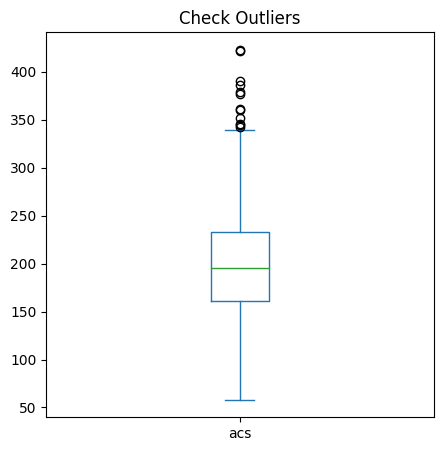

In [52]:
#display box plot

outliers["acs"].plot(kind='box', title='Check Outliers', figsize=(5,5))

<Axes: title={'center': 'Check Outliers'}>

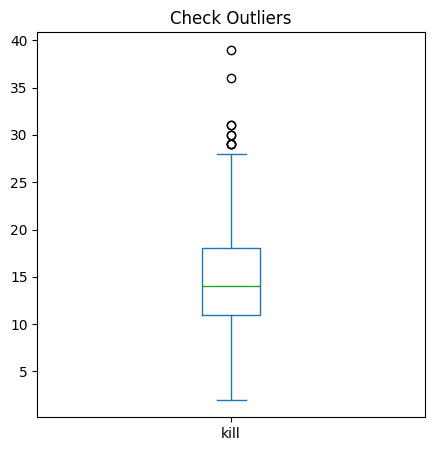

In [53]:
#display box plot

outliers["kill"].plot(kind='box', title='Check Outliers', figsize=(5,5))

In [54]:
#define find outliers

def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)    
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    outlier_values = pd.DataFrame(data.iloc[outliers])
    return outlier_values, lower_bound, upper_bound

In [55]:
#find outliers ACS
outliers,lower, upper = find_outliers_iqr(stats["acs"])
print("Mean : ", round(stats["acs"].mean(),1))
print("Outliers Count : ", outliers.acs.count())
print("Upper Boundary : ", upper )
print("Lower Boundary : ", lower )

print("\nList Outliers : ", outliers)

Mean :  199.1
Outliers Count :  12
Upper Boundary :  341.0
Lower Boundary :  53.0

List Outliers :        acs
141   342
215   361
235   360
250   379
275   422
310   390
415   352
430   386
515   377
706   346
885   345
1090  423


Terdapat 12 outlers pada data ACS, dengan boundary 341 dan 53, semua outliers melebihi batas atas dan tidak ada yang kurang dari batas bawah

Tingginya nilai ACS ini bisa dipengaruhi banyak hal, mulai dari jumlah round yang sedikit sehingga ACS lebih besar, atau pemain yang sangat mendominasi permainan sehingga mudah mendapatkan penilaian ACS

In [56]:
#find outliers Kill
outliers,lower, upper = find_outliers_iqr(stats["kill"])
print("Mean : ", round(stats["kill"].mean(),1))
print("Outliers Count : ", outliers.kill.count())
print("Upper Boundary : ", upper )
print("Lower Boundary : ", lower )

print("\nList Outliers : ", outliers)

Mean :  14.5
Outliers Count :  10
Upper Boundary :  28.5
Lower Boundary :  0.5

List Outliers :        kill
66      29
235     30
240     39
245     31
310     29
570     31
1040    29
1290    30
1291    29
1295    36


Untuk data Kill, terdapat 10 data outliers dengan boundary 28 dan 0.5, semua outliers melebihi batas atas dan tidak ada yang kurang dari batas bawah 

Outliers pada kali ini hanya terdapat pada batas atas karena hampir tidak memungkinkan seorang pemain tidak mendapat kill pada sebuah match jika melihat batas bawah yang hanya 0.5
Untuk outliers yang melebihi batas atas terdapat banyak faktor juga yang mempengaruhi seperti match yang berlangsung lama dengan jumlah round banyak, ataupun pemain yang juga mendominasi sehingga mudah mendapatkan Kill

### Statistik Inferential

In [57]:
#check average Kill player per-game

print("Rata-rata pemain mendapatkan", round(stats["kill"].mean(),0), "Kill pada tiap pertandingan")

Rata-rata pemain mendapatkan 15.0 Kill pada tiap pertandingan


Kita mengetahui bahwa pada turnamen kali ini tiap pemain mendapatkan rata-rata 15 kill, kita dapat asumsikan bahwa pada turnamen sebelumnya tiap pemain juga memiliki rata-rata kill yang sama yaitu 15, sehingga kita bisa menuliskan *null hypothesis* sebagai berikut

* $h0$ = 15 Kill

* $h1$ != 15 Kill


Selanjutnya kita dapat melakukan one sample T-Test untuk menguji hipotesis ini, kita akan menggunakan nilai statisticla significance sebanyak 5%

In [58]:
#one sample t-test
t_stat,p_val = scipystats.ttest_1samp(stats["kill"], 15)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('T-statistic :', t_stat)

alpha = 0.005
if p_val < alpha:
    print("Tolak hipotesis nol")
else:
    print("Gagal tolak hipotesis nol")

P-value: 0.000261630429971718
T-statistic : -3.4770784999998434
Tolak hipotesis nol


Didapatkan hasil P-Value kurang dari 0.5, sehingga kita mendapatkan kesimpulan bahwa $h0$ ditolak, atau bisa kita katakan bahwa kita yakin 95% bahwa rata-rata kill tiap pemain pada turnamen sebelumnya !=15, tetapi hal ini perlu dilakukan observasi lebih jauh lagi menggunakan dataset yang sesuai agar dapat mengambil kesimpulan akhir

![Imgur](https://imgur.com/1zUSPbm.png)

## Kesimpulan

Pada turnamen VCT Pacific 2023 terdapat beberapa insight yang dapat diambil untuk meningkatkan kualitas permainan dari Tim RRQ:
- Killjoy adalah agent yang paling banyak digunakan, dan juga memiliki win rate paling tinggi. Tim RRQ dapat menggunakan agent ini untuk memaksimalkan potensi kemenangan pada map-map tertentu.
- Pada statistik Top Player Kill, mayoritas didominasi oleh tim yang berada pada posisi 3 besar, hal ini secara tidak langsung menggambarkan bahwa aim power pada tim dapat membantu meraih kemenangan. tetapi pada data ini perlu diobservasi lagi terkait korelasinya dengan tingkat kemenangan
- Pada suatu pertandingan, first kill sebuah tim dapat membantu meningkatkan peluang untuk menang, dapat diambil contoh dari permainan DRX vs PRX pada game id 119706, Dari 19 ronder permainan tim DRX berhasil memenangkan pertandingan dengan mendapatkan 12  first kill.
  
Dari insight tersebut terdapat beberapa saran yang dapat diberikan untuk Tim RRQ:
- Tim RRQ dapat meningkatkan pool dari agent yang digunakan saat pertandingan agar dapat memaksimalkan potensi agent yang sedang naik daun atau populer
- Tim RRQ dapat melatih kekuatan aim power agar dapat mendukung tim meraih objektif tim untuk menang
- Tim RRQ dapat menerapkan tipe permainan adaptif dan disiplin agar tidak terjadi kehilangan pemain satu per satu dalam tiap rondenya

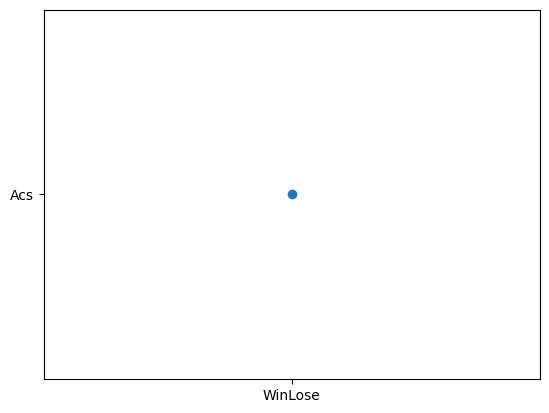

In [59]:
plt.scatter(x="WinLose", y="Acs", data=stats)

C:\Users\defal\AppData\Local\Temp\ipykernel_11532\2284949986.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kill_pop, label='Kill (Population)', color='blue')


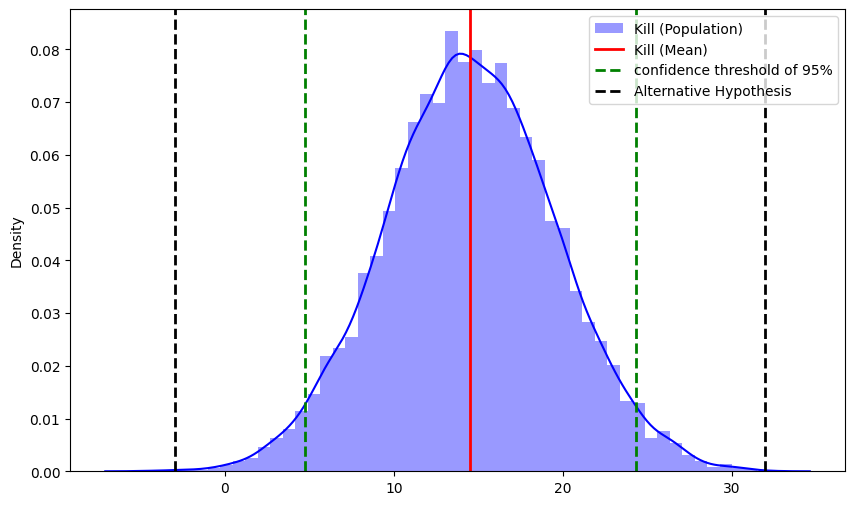

In [67]:
kill_pop = np.random.normal(stats["kill"].mean(), stats["kill"].std(), 10000)

ci = scipystats.norm.interval(0.95, stats["kill"].mean(), stats["kill"].std())

plt.figure(figsize=(10,6))
sns.distplot(kill_pop, label='Kill (Population)', color='blue')
plt.axvline(stats["kill"].mean(), color='red', linewidth=2, label='Kill (Mean)')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2)
plt.axvline(kill_pop.mean() + t_stat*kill_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(kill_pop.mean() - t_stat*kill_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()